summery for ('2008-2009', {'mean': 394999.91576086957, 'median': 31236.2, 'total_export': 72679984.5}):
summery for ('2009-2010', {'mean': 391877.24244565226, 'median': 26158.29, 'total_export': 72105412.61000001}):
summery for ('2010-2011', {'mean': 511053.80293478264, 'median': 31110.11, 'total_export': 94033899.74000001}):
summery for ('2011-2012', {'mean': 687012.9707065218, 'median': 49321.31, 'total_export': 126410386.61000001}):
summery for ('2012-2013', {'mean': 762609.3459782609, 'median': 60487.145000000004, 'total_export': 140320119.66}):
summery for ('2013-2014', {'mean': 879498.7264673912, 'median': 70266.4, 'total_export': 161827765.67}):
summery for ('2014-2015', {'mean': 851350.2690217391, 'median': 85006.98000000001, 'total_export': 156648449.5}):
summery for ('2015-2016', {'mean': 776956.1451630435, 'median': 82648.48000000001, 'total_export': 142959930.71}):
summery for ('2016-2017', {'mean': 852664.1798369564, 'median': 72569.76999999999, 'total_export': 156890209.0

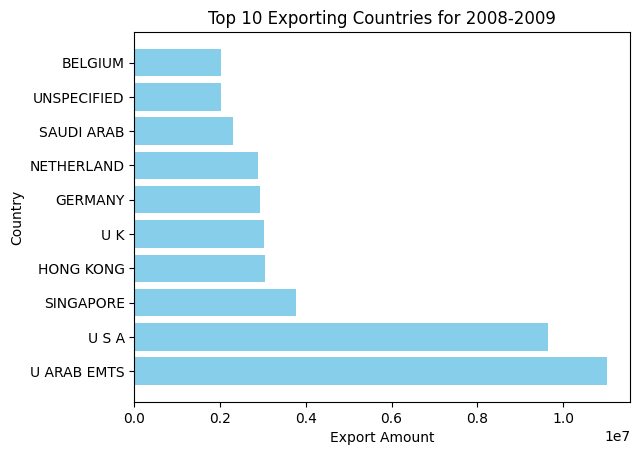

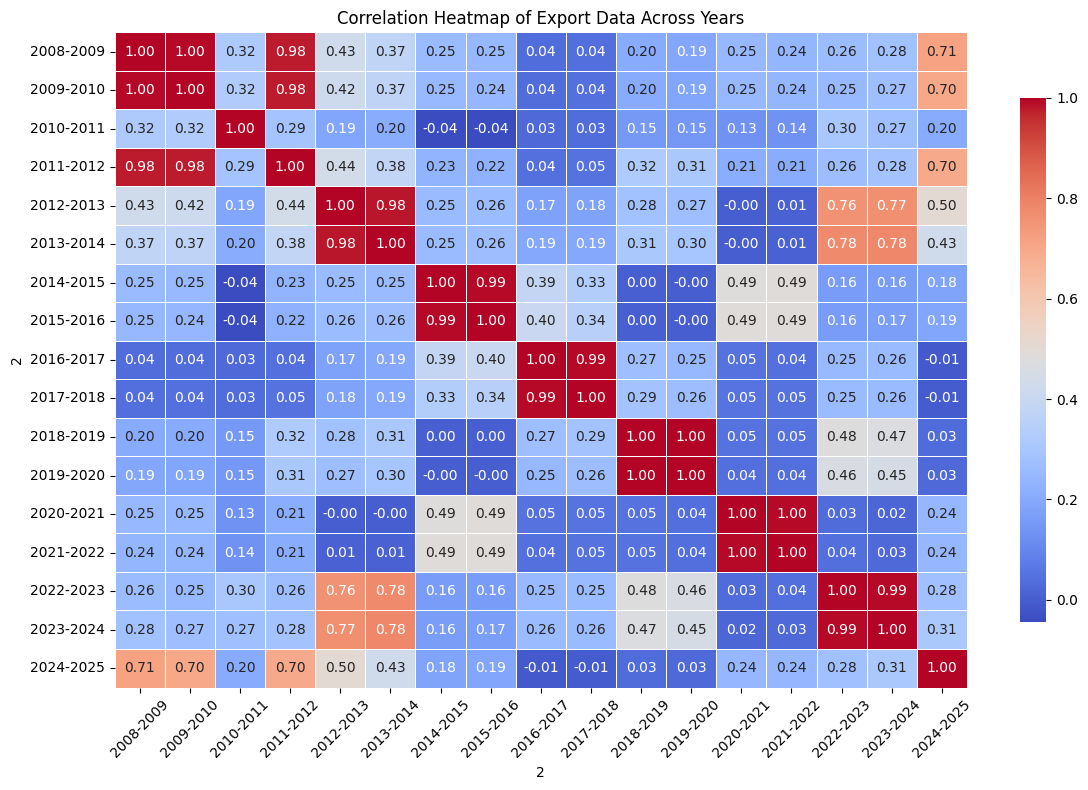

       Country  Total Export
0  AFGHANISTAN    5709576.24
1      ALBANIA    1487242.83
2      ALGERIA    8193479.36


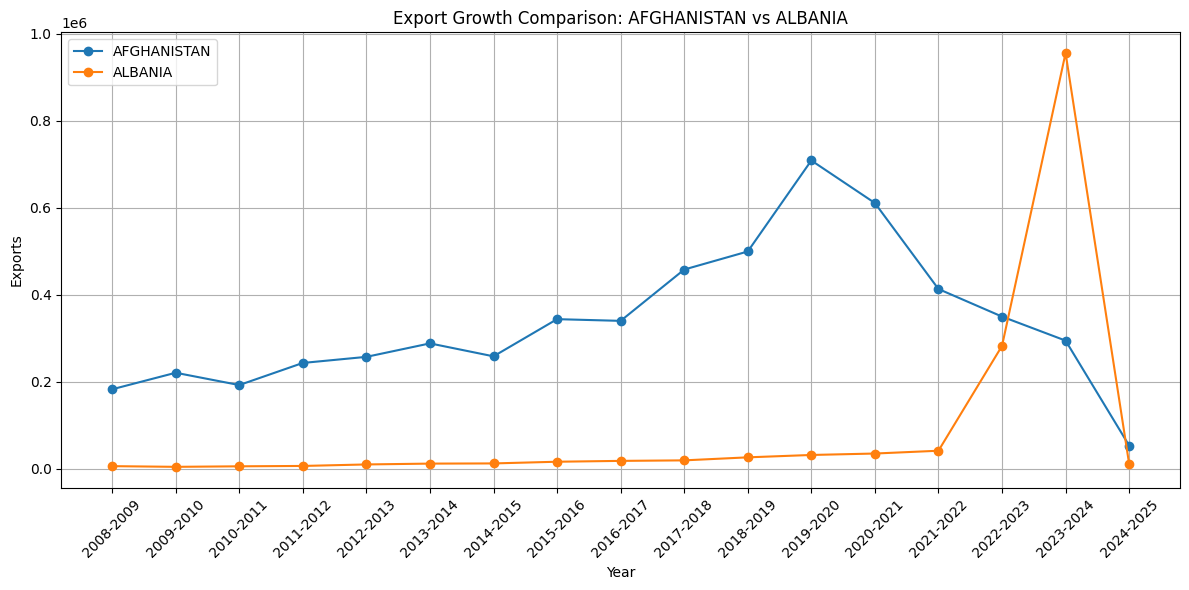

In [8]:
# Final Project: Analyzing International Trade Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/exportall 2009 - 2025.csv')
df.columns=df.iloc[2] #rename columnes according the row2
df=df.drop(index=[0,1,2])#drop three first row of csv file
df=df.reset_index() #reset the index of rows to start from 0
#missing_value=df.isna().sum()
df=df.dropna() #cleaning missing values from rows
missing_value=df.isna().sum() #check if there are missing values
#identify columns with numeric value
numeric_columns=df.select_dtypes(include=['int','float']).columns
#change all numeric values to float
df[numeric_columns]=df[numeric_columns].astype(float)
def clean_export_values(value):
    if isinstance(value, str):  # Check if the value is a string
        # Replace commas with nothing and convert to float
        try:
            value = value.replace(',', '')  # Remove thousands separators
            return float(value)  # Convert to float
        except ValueError:
            return None  # Handle cases where conversion might fail
    return value  # Return the value if it's already clean

#print(f"Cleaned data saved to {cleaned_file_path}")

#df['2008-2009']=df['2008-2009'].apply(clean_export_values)
#df=pd.read_csv('/content/exportall 2009 - 2025_cleaned.csv')
year_columns=[f'{year}-{year+1}' for year in range(2008,2025)]
for col in year_columns:
  if col in df.columns:
    df[col]=df[col].apply(clean_export_values)
# Save the cleaned data back to a new CSV file
cleaned_file_path = ('/content/exportall 2009 - 2025_cleaned.csv')  # Specify the new or original file path
df.to_csv(cleaned_file_path, index=False)  # Save without row index

# Dictionary to hold summary statistics for each year
summary_stats = {}
# Loop through the year columns and calculate the summary statistics
for col in year_columns:
  if col in df.columns:
    summary_stats[col]={
        'mean':df[col].mean(),
        'median':df[col].median(),
        'total_export':df[col].sum()
        }

# Display the summary statistics for each year
for year in summary_stats.items():
  print(f'summery for {year}:')
# Identify top 10 exporting countries for each year
top_exporters = {}
for col in year_columns:
    if col in df.columns:
        top_countries = df[['Country', col]].sort_values(by=col, ascending=False).head(10)
        top_exporters[col] = top_countries

# Display top 10 exporting countries
for year, countries in top_exporters.items():
    print(f"Top 10 exporting countries for {year}:")
    print(countries.to_string(index=False))
    print("\n")

# Growth Rate Analysis
growth_rates = df[['Country']].copy()  # Copy country names

# Loop through the years to calculate growth rates
for i in range(1, len(year_columns)):
    current_year = year_columns[i]
    previous_year = year_columns[i - 1]

    if current_year in df.columns and previous_year in df.columns:
        # Calculate growth rate for each country
        growth_rate_column = f'{current_year}_growth_rate'
        growth_rates[growth_rate_column] = ((df[current_year] - df[previous_year]) / df[previous_year]) * 100

# Identify top 10 countries based on growth rate for each year
top_growth_countries = {}
for i in range(1, len(year_columns)):
  current_year = year_columns[i]
  growth_rate_column = f'{current_year}_growth_rate'
  if growth_rate_column in growth_rates.columns:
        top_growth = growth_rates[['Country', growth_rate_column]].sort_values(by=growth_rate_column, ascending=False).head(10)
        top_growth_countries[current_year] = top_growth

# Display top countries with the highest growth for each year
for year, countries in top_growth_countries.items():
    print(f"Top countries with highest growth for {year}:")
    print(countries.to_string(index=False))
    print("\n")
#**Data Visualization:**
#Bar charts
def plot_10_top_exporting_countries(year):
  if year not in df.columns:
    print(f'year {year} is not in dataset')
    return
  top_countries = df[['Country', year]].sort_values(by=year, ascending=False).head(10)
  plt.figure()
  #horizontal bar chart
  plt.barh(top_countries['Country'], top_countries[year], color='skyblue')
  plt.xlabel('Export Amount')
  plt.ylabel('Country')
  plt.title(f'Top 10 Exporting Countries for {year}')

plot_10_top_exporting_countries('2008-2009')
# line charts to show the export trends over time for selected countries.
# List of selected countries to plot
selected_countries = ['AFGHANISTAN', 'ALBANIA', 'ALGERIA']

# Function to plot export trends over time for selected countries
def export_trend_over_year(countries):
    plt.figure(figsize=(10, 6))

    # Iterate through the selected countries
    for country in countries:
        if country not in df['Country'].values:
            print(f'Country {country} is not in the dataset.')
            continue

        # Extract export data for the selected country
        country_data = df[df['Country'] == country][year_columns].values.flatten()

        # Plot the export trend for the selected country
        plt.plot(year_columns, country_data, label=country)

    # Adding labels and title
    plt.xlabel('Year')
    plt.ylabel('Export Amount')
    plt.title('Export Trends Over Time for Selected Countries')
    plt.legend()  # Show the legend with country names
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()
#export_trend_over_year(selected_countries)
#Generate a heatmap to show the correlation between different years' export data.
# Calculate the correlation matrix for the year columns
correlation_matrix = df[year_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Export Data Across Years')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()
#*Data Aggregation:
#Write a function to aggregate data for a given list of countries
# and return the total exports over the specified period.
def aggregate_exports(countries):
    """
    Aggregate total exports for the given list of countries over the specified period.

    Args:
        countries (list): List of country names to aggregate exports for.

    Returns:
        pd.DataFrame: DataFrame containing total exports for each specified country.
    """
    # Create a list to hold DataFrames for each country
    total_exports_list = []

    # Iterate through the list of countries
    for country in countries:
        if country in df['Country'].values:
            # Calculate the total exports for the country over the specified years
            total_export_value = df.loc[df['Country'] == country, year_columns].sum(axis=1).values[0]
            # Create a DataFrame for the current country's total exports
            total_exports_list.append(pd.DataFrame({'Country': [country], 'Total Export': [total_export_value]}))
        else:
            print(f'Country {country} is not in the dataset.')

    # Concatenate all country DataFrames into one DataFrame
    total_exports = pd.concat(total_exports_list, ignore_index=True) if total_exports_list else pd.DataFrame(columns=['Country', 'Total Export'])

    return total_exports

# Example usage
selected_countries = ['AFGHANISTAN', 'ALBANIA', 'ALGERIA']
total_export_data = aggregate_exports(selected_countries)
print(total_export_data)
#Country Comparison:
#Write a function that  compares the export growth
#of two selected countries over the years.
def compare_export_growth(country1, country2):
    # Check if both countries exist in the dataset
    if country1 not in df['Country'].values:
        print(f'Country {country1} is not in the dataset.')
        return
    if country2 not in df['Country'].values:
        print(f'Country {country2} is not in the dataset.')
        return

    # Extract the export data for both countries
    country1_data = df.loc[df['Country'] == country1, year_columns].values.flatten()
    country2_data = df.loc[df['Country'] == country2, year_columns].values.flatten()

    # Create a line chart to compare the exports
    plt.figure(figsize=(12, 6))
    plt.plot(year_columns, country1_data, marker='o', label=country1)
    plt.plot(year_columns, country2_data, marker='o', label=country2)
    plt.title(f'Export Growth Comparison: {country1} vs {country2}')
    plt.xlabel('Year')
    plt.ylabel('Exports')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Example usage
compare_export_growth('AFGHANISTAN', 'ALBANIA')


